### Procesamiento Imagen

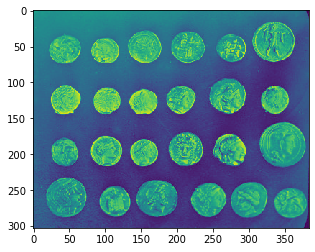

In [91]:
from skimage import data
import matplotlib.pyplot as plt
coins=data.coins()
plt.imshow(coins)

In [92]:
def mostrar_imagen(imagen):
    fig,ax=plt.subplots(figsize=[7,7])
    ax.imshow(imagen,cmap='gray')
    plt.show()

(1201, 1300)

numpy.ndarray

1.0

0.0025

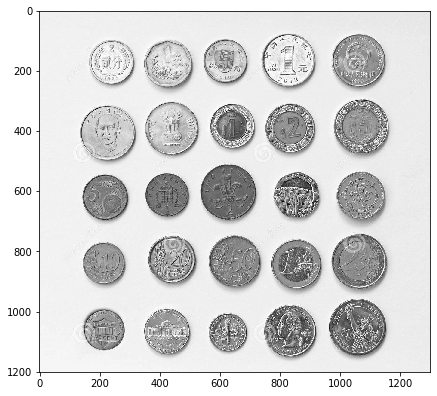

In [93]:
import skimage.io as io
import numpy as np
from skimage.color import rgb2gray
monedas = io.imread(fname="images/monedas.jpg")
monedas = rgb2gray(monedas)
display(monedas.shape)
display(type(monedas))
display(np.max(monedas))
display(np.min(monedas))
mostrar_imagen(monedas)

In [94]:
arr=np.arange(16).reshape(4,4)
display(arr)
display(np.max(arr,axis=0))
display(np.max(arr,axis=1))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([12, 13, 14, 15])

array([ 3,  7, 11, 15])

In [95]:
arr_img_col=np.mean(monedas,axis=0)
arr_img_row=np.mean(monedas,axis=1)
display(arr_img_col)
display(arr_img_row)

array([0.94834657, 0.94836304, 0.94846985, ..., 0.91708324, 0.91702773,
       0.91702446])

array([0.91833843, 0.91832203, 0.91851973, ..., 0.94799659, 0.9480371 ,
       0.94353433])

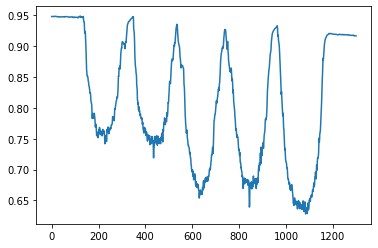

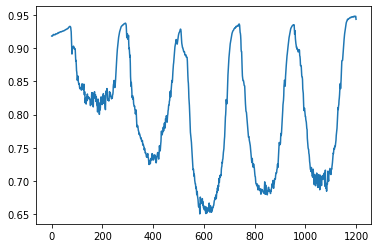

In [96]:
plt.plot(arr_img_col)
plt.show()
plt.plot(arr_img_row)
plt.show()

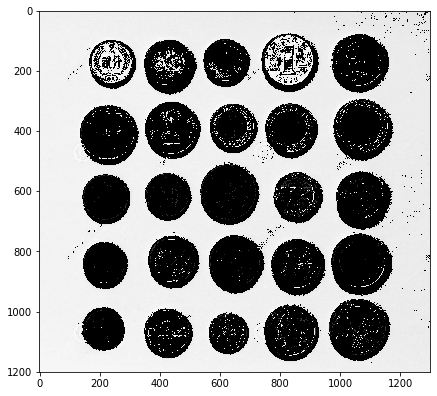

In [97]:
image_nueva=monedas.copy()
image_nueva[(image_nueva>0.25)&(image_nueva<0.90)]=0
mostrar_imagen(image_nueva)

#image_nueva[>0.65,:] = 0
#image_nueva[>0.75 ] = 0

In [98]:
arr=np.arange(10).reshape(2,5)
display(arr)
display(arr[0,:])
display(arr[1,:])
display(arr[:,0])
display(arr[:,1])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

array([0, 1, 2, 3, 4])

array([5, 6, 7, 8, 9])

array([0, 5])

array([1, 6])

### Edge Detectors

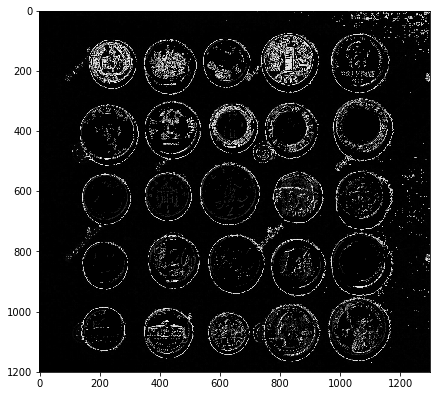

In [99]:
import skimage.filters as filters
image_sobel=filters.sobel(image_nueva)
mostrar_imagen(image_sobel)


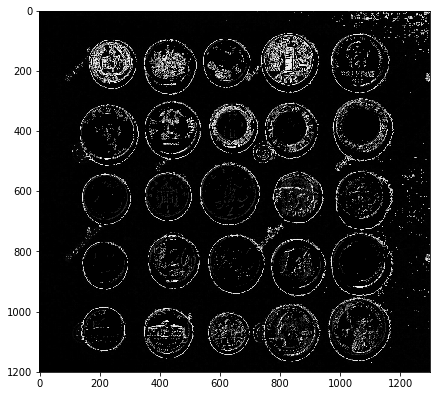

In [100]:
import skimage.filters as filters
imagen_prewitt = filters.prewitt(image_nueva)
mostrar_imagen(imagen_prewitt)

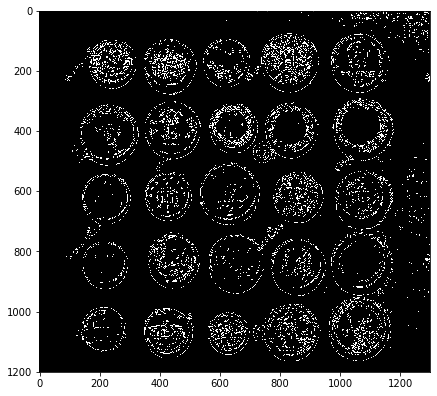

In [101]:
import skimage.feature as feature
imagen_canny= feature.canny(image_nueva)
mostrar_imagen(imagen_canny)

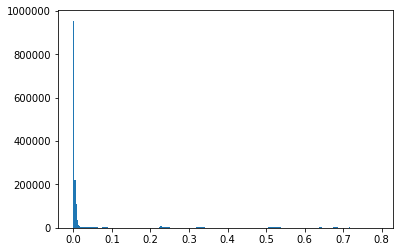

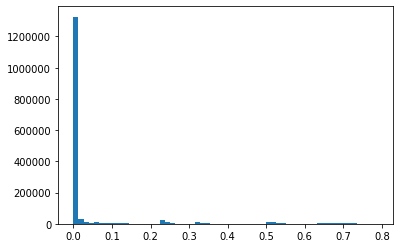

In [102]:
import matplotlib.pyplot as plt 
plt.hist(image_sobel.ravel(),bins=255)
plt.show()
plt.hist(image_sobel.ravel(),bins=60)
plt.show()

0.04669814579870946

0.2698219974805648

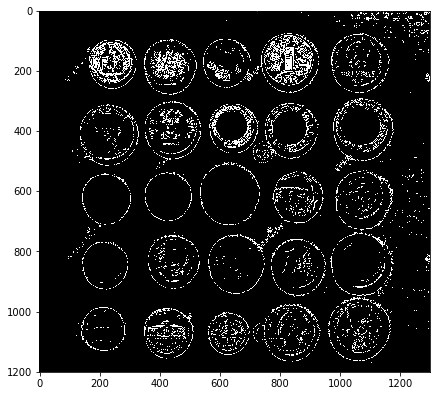

In [103]:
import skimage.filters as filters
threshold_mean=np.mean(image_sobel)
threshold_val=filters.threshold_otsu(image_sobel)
display(threshold_mean,threshold_val)
imagen_binaria=image_sobel>threshold_val
mostrar_imagen(imagen_binaria)

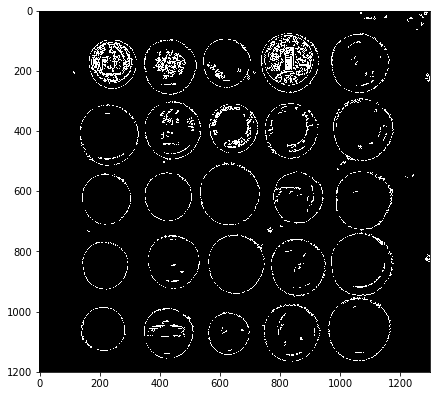

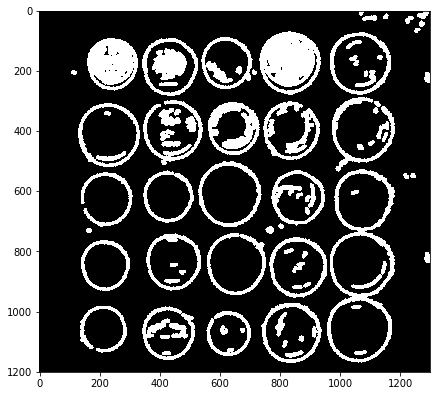

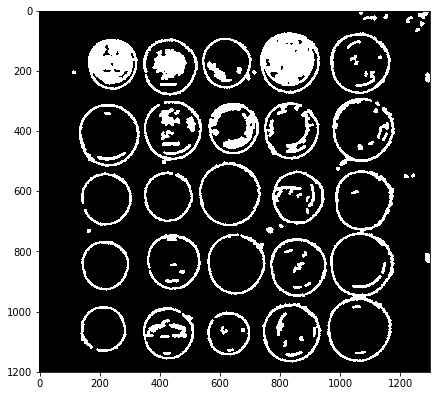

In [165]:
from skimage import morphology
from skimage.morphology import square,disk
im0=morphology.remove_small_objects(imagen_binaria,40)
mostrar_imagen(im0)
im1=morphology.dilation(image=im0,selem=disk(5))
mostrar_imagen(im1)
im2=morphology.erosion(image=im1,selem=disk(2))
mostrar_imagen(im2)

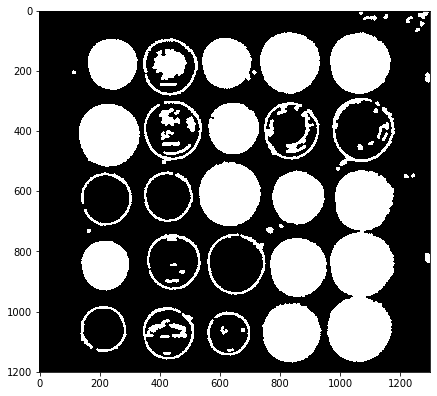

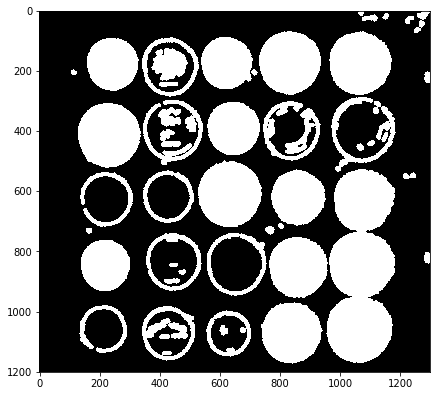

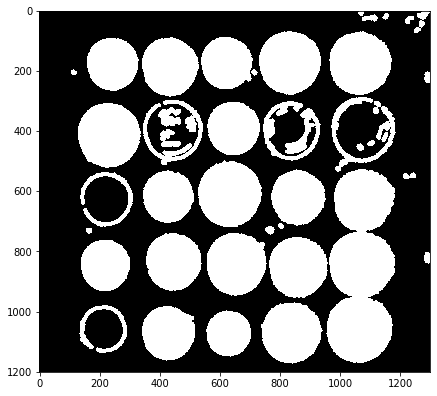

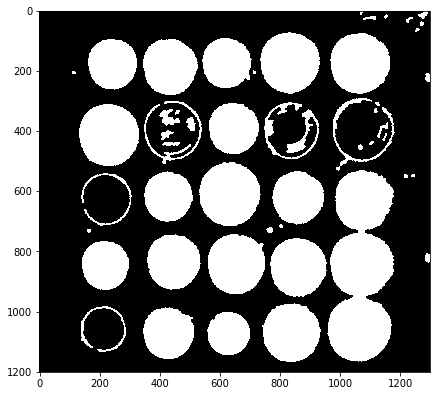

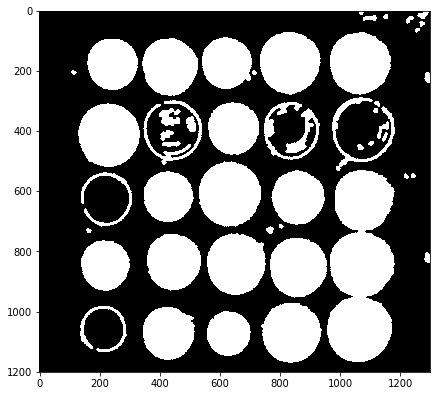

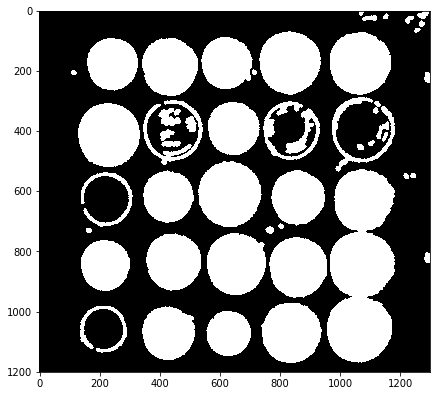

In [172]:
from scipy import ndimage as ndi
im3 = ndi.binary_fill_holes(im2)
mostrar_imagen(im3)
im4 = morphology.dilation(image=im3,selem=disk(3))
mostrar_imagen(im4)
im5 = ndi.binary_fill_holes(im4)
mostrar_imagen(im5)
im6 = morphology.erosion(image=im5,selem=disk(4))
mostrar_imagen(im6)
im7 = morphology.dilation(image=im6,selem=disk(2))
mostrar_imagen(im7)
im8 = morphology.erosion(image=im7,selem=disk(4))
im9 = morphology.dilation(image=im6,selem=disk(3))
im10 = ndi.binary_fill_holes(im9)
mostrar_imagen(im10)


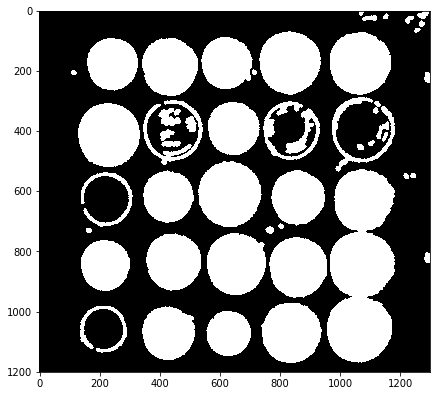

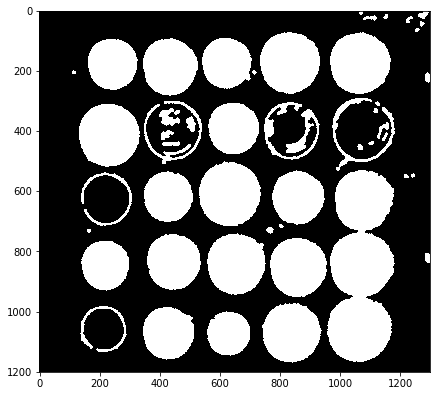

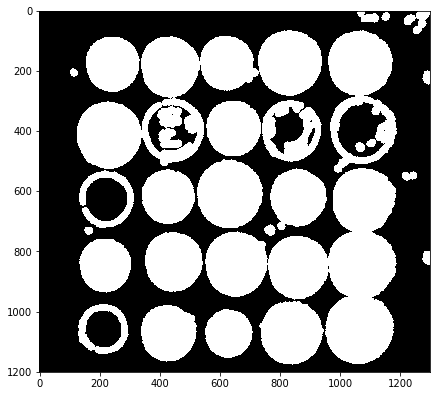

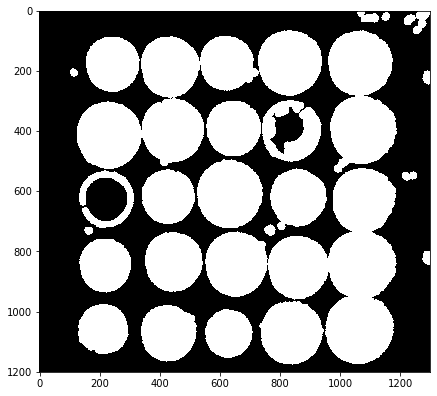

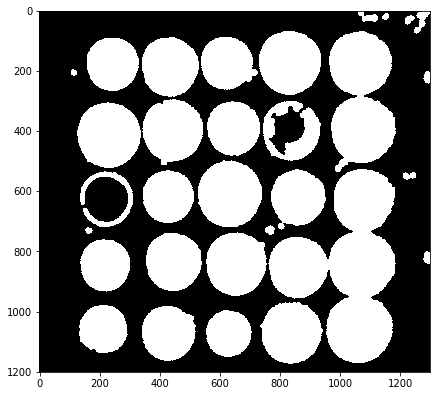

In [177]:
im11=morphology.remove_small_objects(im10,50)
mostrar_imagen(im11)
im12=morphology.erosion(image=im10,selem=disk(2))
mostrar_imagen(im12)
im13=morphology.dilation(image=im11,selem=disk(5))
mostrar_imagen(im13)
im14 = ndi.binary_fill_holes(im13)
mostrar_imagen(im14)
im15=morphology.erosion(image=im14,selem=disk(3))
mostrar_imagen(im15)